# 加载因果图的方法
 
我们建议使用GML图形格式加载因果图。您还可以使用DOT格式，该格式需要其他依赖项（pydot或pygraphviz）。DoWhy支持通过字符串或文件（扩展名为“ gml”或“ dot”）载入因果图。下面的示例显示了加载同一因果图的不同方式。


In [1]:
import os, sys
import random
sys.path.append(os.path.abspath("../../../"))

import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
from IPython.display import Image, display


We generate some dummy data for three variables: X, Y and Z. 

In [2]:
z=[i for i in range(10)]
random.shuffle(z)
df = pd.DataFrame(data = {'Z': z, 'X': range(0,10), 'Y': range(0,100,10)})
df

,Z,X,Y
0,5,0,0
1,1,1,10
2,7,2,20
3,6,3,30
4,4,4,40
5,3,5,50
6,2,6,60
7,9,7,70
8,0,8,80
9,8,9,90


## Loading GML graphs


首先看看如何载入 GML 格式的图。

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X'] on outcome ['Y']


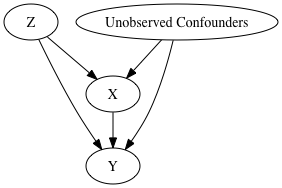

In [3]:
# With GML string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="""graph[directed 1 node[id "Z" label "Z"]  
                    node[id "X" label "X"]
                    node[id "Y" label "Y"]      
                    edge[source "Z" target "X"]    
                    edge[source "Z" target "Y"]     
                    edge[source "X" target "Y"]]"""
                    
        )

model.view_model()
display(Image(filename="causal_model.png"))

In [4]:
!cat ../example_graphs/simple_graph_example.gml

graph[
    directed 1
    node[ id "Z" label "Z"]
    node[ id "X" label "X"]
    node[ id "Y" label "Y"]
    edge[source "Z" target "X"]
    edge[source "Z" target "Y"]
    edge[source "X" target "Y"]
]


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X'] on outcome ['Y']


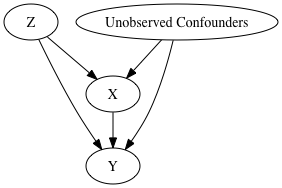

In [5]:
# With GML file
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="../example_graphs/simple_graph_example.gml"
        )
model.view_model()


display(Image(filename="causal_model.png"))

## Loading DOT graphs

DOT 格式的图也可以用于指定因果模型的图结构。

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X'] on outcome ['Y']


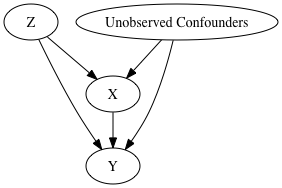

In [6]:
# With DOT string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="digraph {Z -> X;Z -> Y;X -> Y;}"
        )
model.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [7]:
cat ../example_graphs/simple_graph_example.dot

digraph G {Z -> X;Z -> Y;X -> Y;}


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X'] on outcome ['Y']


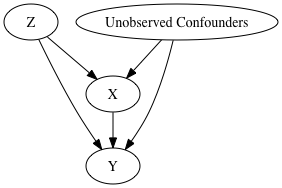

In [8]:
# With DOT file
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="../example_graphs/simple_graph_example.dot"
        )
model.view_model()


display(Image(filename="causal_model.png"))